In [1]:
import pandas as pd
import numpy as np
from data import update_game, mark_played, update_model_scores
from model.model import update_models
from model.core import load_Xy, richard_curve

In [2]:
update_game(
    metacritic_url='https://www.metacritic.com/game/lies-of-p-overture/',
    title="Lies of P: Overture",
    #title=None,
    classic=False,
    soulslike=True,
)

https://www.metacritic.com/game/lies-of-p-overture/ Lies of P: Overture
https://www.metacritic.com/game/lies-of-p-overture/ Lies of P: Overture


C:\Users\derek\miniconda3\envs\backlog\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:28:44] WARNING: D:\bld\xgboost-split_1738880170463\work\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
C:\Users\derek\miniconda3\envs\backlog\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(


Title          Lies of P: Overture
glicko                         NaN
raw_score              1607.256266
model_score                    NaN
Name: 592, dtype: object

In [4]:
mark_played(title='The Lord Of The Rings The Two Towers')

In [2]:
#update_models()
update_model_scores()

C:\Users\derek\DataspellProjects\derks-backlog\.venv\Lib\site-packages\xgboost\core.py:729: UserWarning: [15:23:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)
C:\Users\derek\DataspellProjects\derks-backlog\.venv\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but RidgeCV was fitted without feature names
  warnings.warn(
C:\Users\derek\DataspellProjects\derks-backlog\sheets.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no 

3822 cells updated.


C:\Users\derek\DataspellProjects\derks-backlog\sheets.py:42: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([


5760 cells updated.


In [3]:
from sheets import update_values

<Axes: >

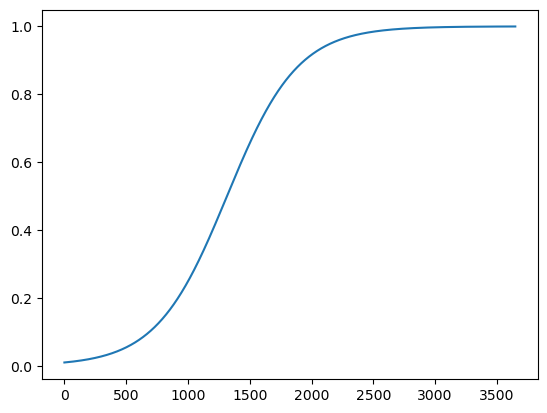

In [27]:
pd.Series([richard_curve(n, b=0.0035, v=1, q=100) for n in range(365*10)]).plot()

In [15]:
df = pd.read_csv('game_log.csv')

In [16]:
df.loc[pd.to_datetime(df.last_played, format='mixed').dt.year == 2025, ['Title', 'glicko']]

,Title,glicko
45,Halo: Combat Evolved,1624.122142
199,Dark Souls,1824.746413
258,Bloodborne,1879.771804
330,Dark Souls: Remastered,1824.746413
338,Return of the Obra Dinn,1397.881149
495,Balatro,1616.706140
512,Metaphor: ReFantazio,1600.242548
537,Doom (1993),1413.065605
557,Yellow Taxi Goes Vroom,1329.028155
581,The First Berserker: Khazan,1327.393546
